# Some Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ml_project_functions as f

## Data acquisition

In [2]:
# data acquisition from fs

dir_path = ".\\Datasets"

training_advanced = pd.read_json(dir_path + "\\training_advanced_players.json")  # False: 3295, True: 72 -> 3367 data cases
test_advanced = pd.read_json(dir_path + "\\test_advanced_players.json")  # test set: False: 81, True: 19
 
training_per_100_poss = pd.read_json(dir_path + "\\training_per_100_poss_players.json") # False: 3295, True: 72 -> 3367 data cases   
test_per_100_poss = pd.read_json(dir_path + "\\test_per_100_poss_players.json") # test set: False: 81, True: 19

## Data preparation

In [ ]:
def dataset_preparation(n_df):
    n_df = n_df[(n_df['G'] >= 100)]  # n_df = n_df[(n_df['To'] - n_df['From'] >= 3)]
    n_df.set_index(pd.Index([i for i in range(n_df.shape[0])]))
    n_df['Hof'] = n_df['Hof'].astype(int)  # n_df.loc[:, 'Hof'] = n_df['Hof'].astype(int)

    if 'PER' in list(n_df.columns):
        n_df = n_df.drop(columns=['Unnamed: 14', 'Unnamed: 16', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 21',
                                  'Unnamed: 23', 'Unnamed: 24'])
    else:
        n_df = n_df.drop(columns=['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 29'])

    return n_df.fillna(0).sample(frac=1, random_state=23)

In [ ]:
# general data preparation
training_advanced_prepared = dataset_preparation(training_advanced.copy())
test_advanced_prepared = dataset_preparation(test_advanced.copy())

training_advanced_prepared['Id'] = [i for i in range(training_advanced_prepared.shape[0])]
test_advanced_prepared['Id'] = [i for i in range(test_advanced_prepared.shape[0])]


training_per_100_poss_prepared = dataset_preparation(training_per_100_poss.copy())
test_per_100_poss_prepared = dataset_preparation(test_per_100_poss.copy())

training_per_100_poss_prepared['Id'] = [i for i in range(training_per_100_poss_prepared.shape[0])]
test_per_100_poss_prepared['Id'] = [i for i in range(test_per_100_poss_prepared.shape[0])]

In [7]:
print("# training advanced 0: ", training_advanced_prepared[training_advanced_prepared['Hof'] == 0].shape[0])
print("# training advanced 1: ", training_advanced_prepared[training_advanced_prepared['Hof'] == 1].shape[0])

print("# test advanced 0: ", test_advanced_prepared[test_advanced_prepared['Hof'] == 0].shape[0])
print("# test advanced 1: ", test_advanced_prepared[test_advanced_prepared['Hof'] == 1].shape[0])

print("# training per 100 poss 0: ", training_per_100_poss_prepared[training_per_100_poss_prepared['Hof'] == 0].shape[0])
print("# training per 100 poss 1: ", training_per_100_poss_prepared[training_per_100_poss_prepared['Hof'] == 1].shape[0])

print("# test per 100 poss 0: ", test_per_100_poss_prepared[test_per_100_poss_prepared['Hof'] == 0].shape[0])
print("# test per 100 poss 1: ", test_per_100_poss_prepared[test_per_100_poss_prepared['Hof'] == 1].shape[0])


training advanced 0:  1903
training advanced 1:  72
test advanced 0:  81
test advanced 1:  19
training per 100 poss 0:  1899
training per 100 poss 1:  72
test per 100 poss 0:  81
test per 100 poss 1:  19


In [8]:
# Prep 2

training_ad_prepared = training_advanced_prepared.copy()
test_ad_prepared = test_advanced_prepared.copy()

print(training_ad_prepared.describe())
train_ad_prepared_hof, train_ad_prepared_not_hof = (training_ad_prepared[training_ad_prepared['Hof'] == 1],
                                                    training_ad_prepared[training_ad_prepared['Hof'] == 0])
# mean_mp = train_ad['MP'].sum()/train_ad.shape[0]

print(test_ad_prepared.describe())
test_ad_prepared_hof, test_ad_prepared_not_hof = test_ad_prepared[test_ad_prepared['Hof'] == 1], test_ad_prepared[test_ad_prepared['Hof'] == 0]
# mean_mp_hof = test_ad['MP'].sum()/test_ad.shape[0]

          Age     Pos            G            MP          PER          TS%  \
count  1975.0  1975.0  1975.000000   1975.000000  1975.000000  1975.000000   
mean      0.0     0.0   482.438987  11433.075949    13.180051     0.524459   
std       0.0     0.0   304.214024   9870.492984     3.099357     0.041759   
min       0.0     0.0   100.000000    524.000000     4.900000     0.371000   
25%       0.0     0.0   223.000000   3425.500000    11.000000     0.498000   
50%       0.0     0.0   421.000000   8428.000000    12.900000     0.523000   
75%       0.0     0.0   695.000000  16413.500000    14.900000     0.549000   
max       0.0     0.0  1611.000000  54852.000000    27.900000     0.732000   

              3PAr          FTr         ORB%         DRB%  ...           WS  \
count  1975.000000  1975.000000  1975.000000  1975.000000  ...  1975.000000   
mean      0.176820     0.297424     5.986633    13.813873  ...    23.701114   
std       0.189979     0.117623     3.520570     5.331344  .

# Plotting function

In [31]:
def plotting_dataset(df, columns_map):
    n_df = df.copy()
    size = len(columns_map)

    fig, ax = plt.subplots(size, 1, figsize=(7, 3 * size), constrained_layout=True)
    # width_ratios=[3 for _ in range(size)], height_ratios=[5 for _ in range(size)]

    for i, x_y_list in columns_map.items():
        sub_p = ax if size == 1 else ax[i]
        x_col = x_y_list[0]
        y_col = x_y_list[1]

        sub_p.set_title(f"{x_col} X {y_col}")
        sub_p.set_xlabel(x_col)
        sub_p.set_ylabel(y_col)

        dict = {
            'Not hof': [n_df[x_col][n_df['Hof'] == 0], n_df[y_col][n_df['Hof'] == 0], 'yellow'],
            'Hof': [n_df[x_col][n_df['Hof'] == 1], n_df[y_col][n_df['Hof'] == 1], 'blue'],
            'Mean': [sum(n_df[x_col]) / n_df.shape[0], sum(n_df[y_col]) / n_df.shape[0], 'red']
        }
        for label, list_value in dict.items():
            x_vals = list_value[0]
            y_vals = list_value[1]
            color = list_value[2]
            sub_p.scatter(x_vals, y_vals, color=color, label=label)

        sub_p.legend()

    return fig, ax

## Some advanced plots

In [ ]:
# Valid features

advanced_columns = list(training_advanced_prepared.columns)
columns_to_remove = ['Age', 'Pos', 'G', 'MP', 'From', 'To', 'Player', 'Hof']
valid_advanced_columns = list(filter(lambda column: column not in columns_to_remove, advanced_columns))

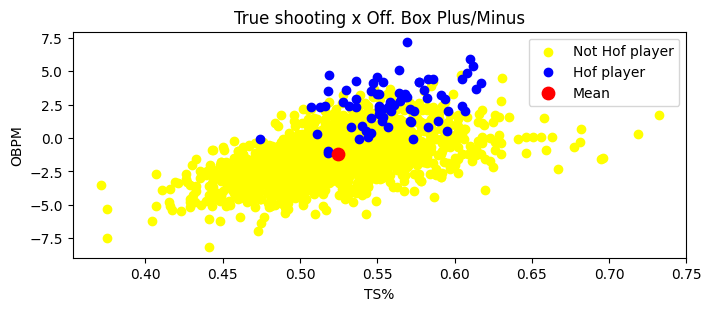

In [9]:
# Some advanced plots on (TS%)  

training_ad_prepared = training_advanced_prepared.copy()
test_ad_prepared = test_advanced_prepared.copy()

# TS% X OBPM
fig_TS_X_OBPM, ax = plt.subplots(1, 1, figsize=(7, 3), constrained_layout=True)
ts_obpm = ax
ts_obpm.set_xlabel("TS%")
ts_obpm.set_ylabel("OBPM")
ts_obpm.set_title('True shooting x Off. Box Plus/Minus')
ts_obpm.scatter(train_ad_prepared_not_hof['TS%'], train_ad_prepared_not_hof['OBPM'], color='yellow', label='Not Hof player')
ts_obpm.scatter(train_ad_prepared_hof['TS%'], train_ad_prepared_hof['OBPM'], color='blue', label='Hof player')
ts_obpm.scatter(training_ad_prepared['TS%'].sum() / training_ad_prepared.shape[0], training_ad_prepared['OBPM'].sum() / training_ad_prepared.shape[0], color='red', s=80, label='Mean')
# ts_obpm.scatter(training_ad_prepared['TS%'].loc[train_ad_prepared_hof['OBPM'] == train_ad_prepared_hof['OBPM'].min(), 
# train_ad_prepared_hof['OBPM'].min(), color='brown', 
# label='Min Hof', s=70)
ts_obpm.legend()

plt.show()

(<Figure size 700x600 with 2 Axes>,
 array([<Axes: title={'center': 'Id X BPM'}, xlabel='Id', ylabel='BPM'>,
        <Axes: title={'center': 'Id X TS%'}, xlabel='Id', ylabel='TS%'>],
       dtype=object))

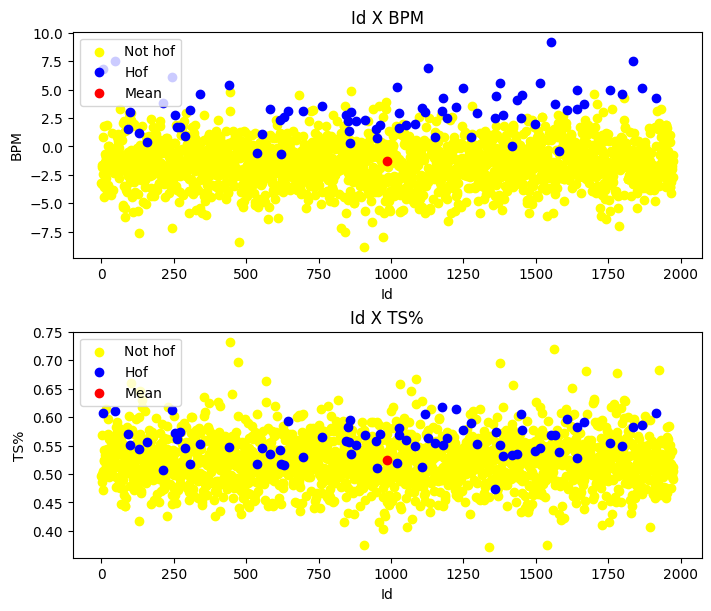

In [11]:
# Some advanced plots (BPM & TS)

dict =  {0 : ['Id', 'BPM'],
         1 : ['Id', 'TS%'],
         2 : ['DBPM', 'OBPM']}

plotting_dataset(training_advanced_prepared.copy(), dict)

(<Figure size 700x900 with 3 Axes>,
 array([<Axes: title={'center': 'BPM X DBPM'}, xlabel='BPM', ylabel='DBPM'>,
        <Axes: title={'center': 'BPM X OBPM'}, xlabel='BPM', ylabel='OBPM'>,
        <Axes: title={'center': 'DBPM X OBPM'}, xlabel='DBPM', ylabel='OBPM'>],
       dtype=object))

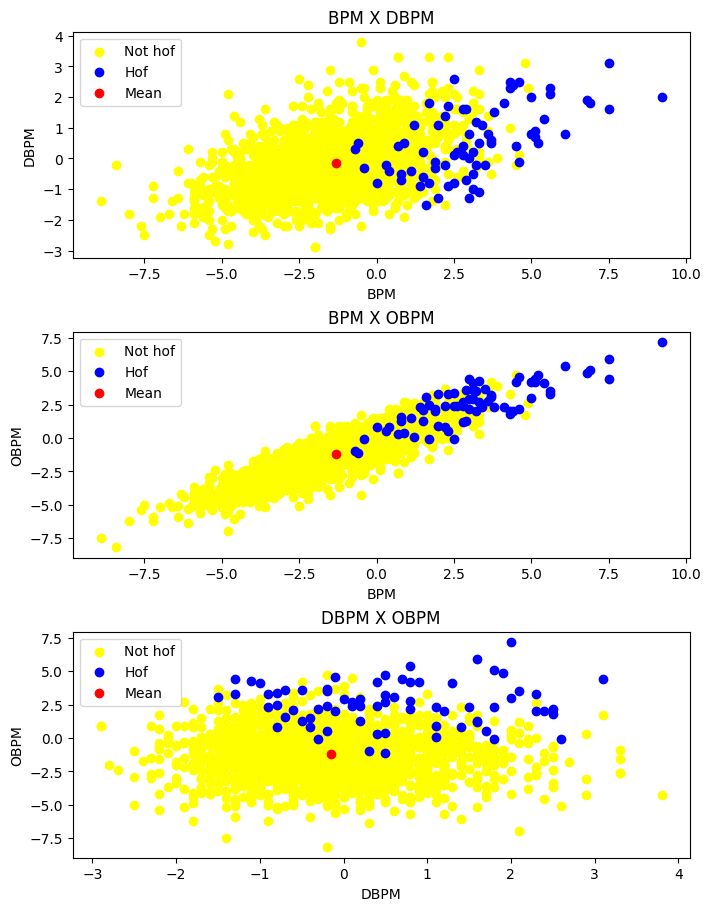

In [17]:
# Some advanced plots (BPM, DBPM, OBPM)

dict =  {0 : ['BPM', 'DBPM'],
         1 : ['BPM', 'OBPM'],
         2 : ['DBPM', 'OBPM']}

plotting_dataset(training_advanced_prepared.copy(), dict)

(<Figure size 700x1800 with 6 Axes>,
 array([<Axes: title={'center': 'WS X DWS'}, xlabel='WS', ylabel='DWS'>,
        <Axes: title={'center': 'WS X OWS'}, xlabel='WS', ylabel='OWS'>,
        <Axes: title={'center': 'DWS X OWS'}, xlabel='DWS', ylabel='OWS'>,
        <Axes: title={'center': 'WS/48 X DWS/48'}, xlabel='WS/48', ylabel='DWS/48'>,
        <Axes: title={'center': 'WS/48 X OWS/48'}, xlabel='WS/48', ylabel='OWS/48'>,
        <Axes: title={'center': 'DWS/48 X OWS/48'}, xlabel='DWS/48', ylabel='OWS/48'>],
       dtype=object))

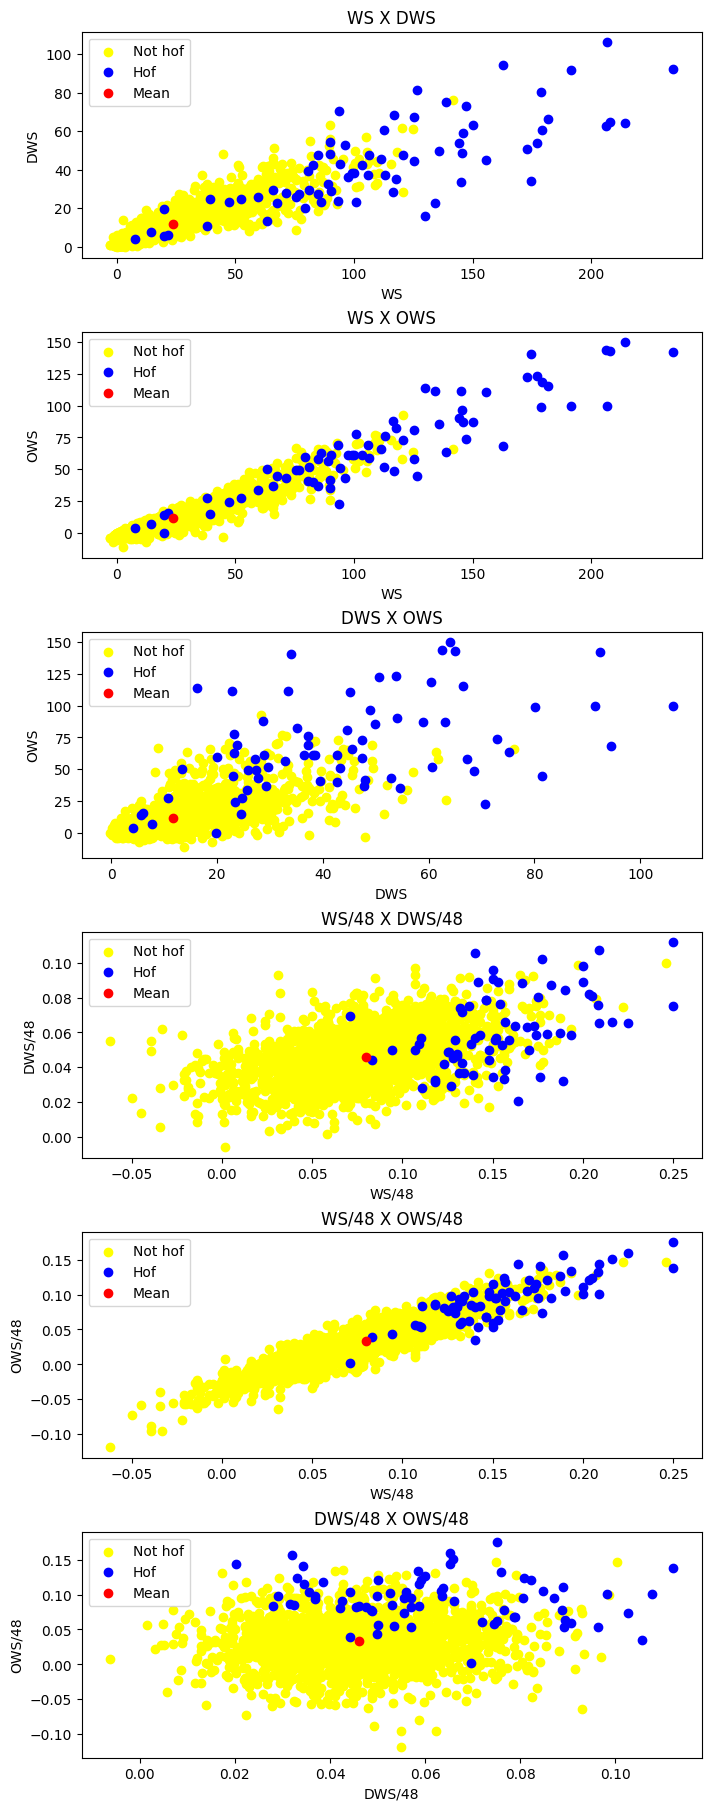

In [18]:
# Some advanced plots (WS, WS/48, ...)

training_ad_prepared = training_advanced_prepared.copy()
training_ad_prepared['DWS/48'] = (training_ad_prepared['DWS'] * 48 / training_ad_prepared['MP']).fillna(0)
training_ad_prepared['OWS/48'] = (training_ad_prepared['OWS'] * 48 / training_ad_prepared['MP']).fillna(0)

dict = {0 : ['WS', 'DWS'],
        1 : ['WS', 'OWS'],
        2 : ['DWS', 'OWS'],
        3 : ['WS/48', 'DWS/48'],
        4 : ['WS/48', 'OWS/48'],
        5 : ['DWS/48', 'OWS/48']}

plotting_dataset(training_ad_prepared, dict)

(<Figure size 700x1500 with 5 Axes>,
 array([<Axes: title={'center': 'PER X BPM'}, xlabel='PER', ylabel='BPM'>,
        <Axes: title={'center': 'PER X OBPM'}, xlabel='PER', ylabel='OBPM'>,
        <Axes: title={'center': 'PER X WS/48'}, xlabel='PER', ylabel='WS/48'>,
        <Axes: title={'center': 'PER X OWS'}, xlabel='PER', ylabel='OWS'>,
        <Axes: title={'center': 'PER X VORP'}, xlabel='PER', ylabel='VORP'>],
       dtype=object))

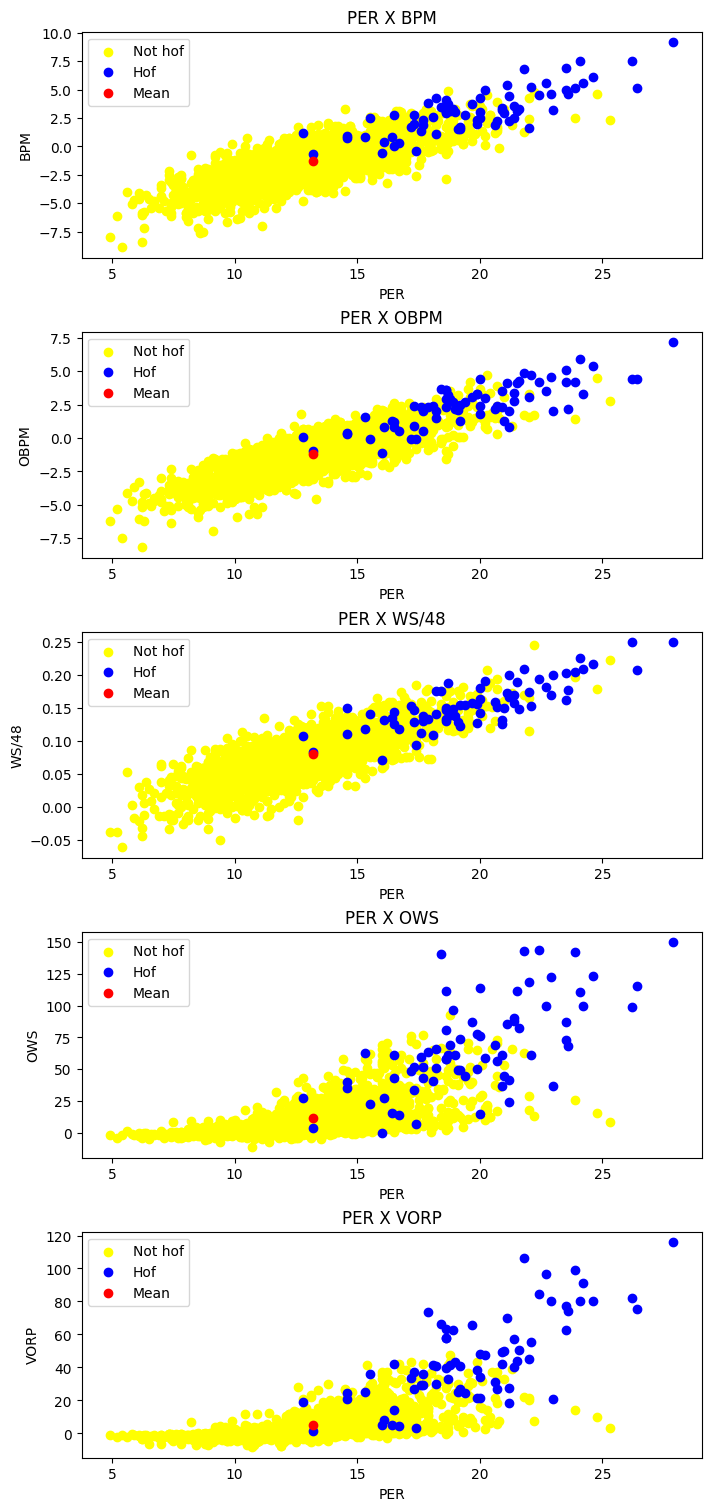

In [19]:
# Some advanced plots (PER)

dict = {0 : ['PER', 'BPM'],
        1 : ['PER', 'OBPM'],
        2 : ['PER', 'WS/48'],
        3 : ['PER', 'OWS'],
        4 : ['PER', 'VORP']}

plotting_dataset(training_advanced_prepared.copy(), dict)

(<Figure size 700x1800 with 6 Axes>,
 array([<Axes: title={'center': 'VORP X VORP/48'}, xlabel='VORP', ylabel='VORP/48'>,
        <Axes: title={'center': 'VORP X BPM'}, xlabel='VORP', ylabel='BPM'>,
        <Axes: title={'center': 'VORP/48 X PER'}, xlabel='VORP/48', ylabel='PER'>,
        <Axes: title={'center': 'VORP/48 X BPM'}, xlabel='VORP/48', ylabel='BPM'>,
        <Axes: title={'center': 'VORP/48 X OBPM'}, xlabel='VORP/48', ylabel='OBPM'>,
        <Axes: title={'center': 'VORP/48 X WS/48'}, xlabel='VORP/48', ylabel='WS/48'>],
       dtype=object))

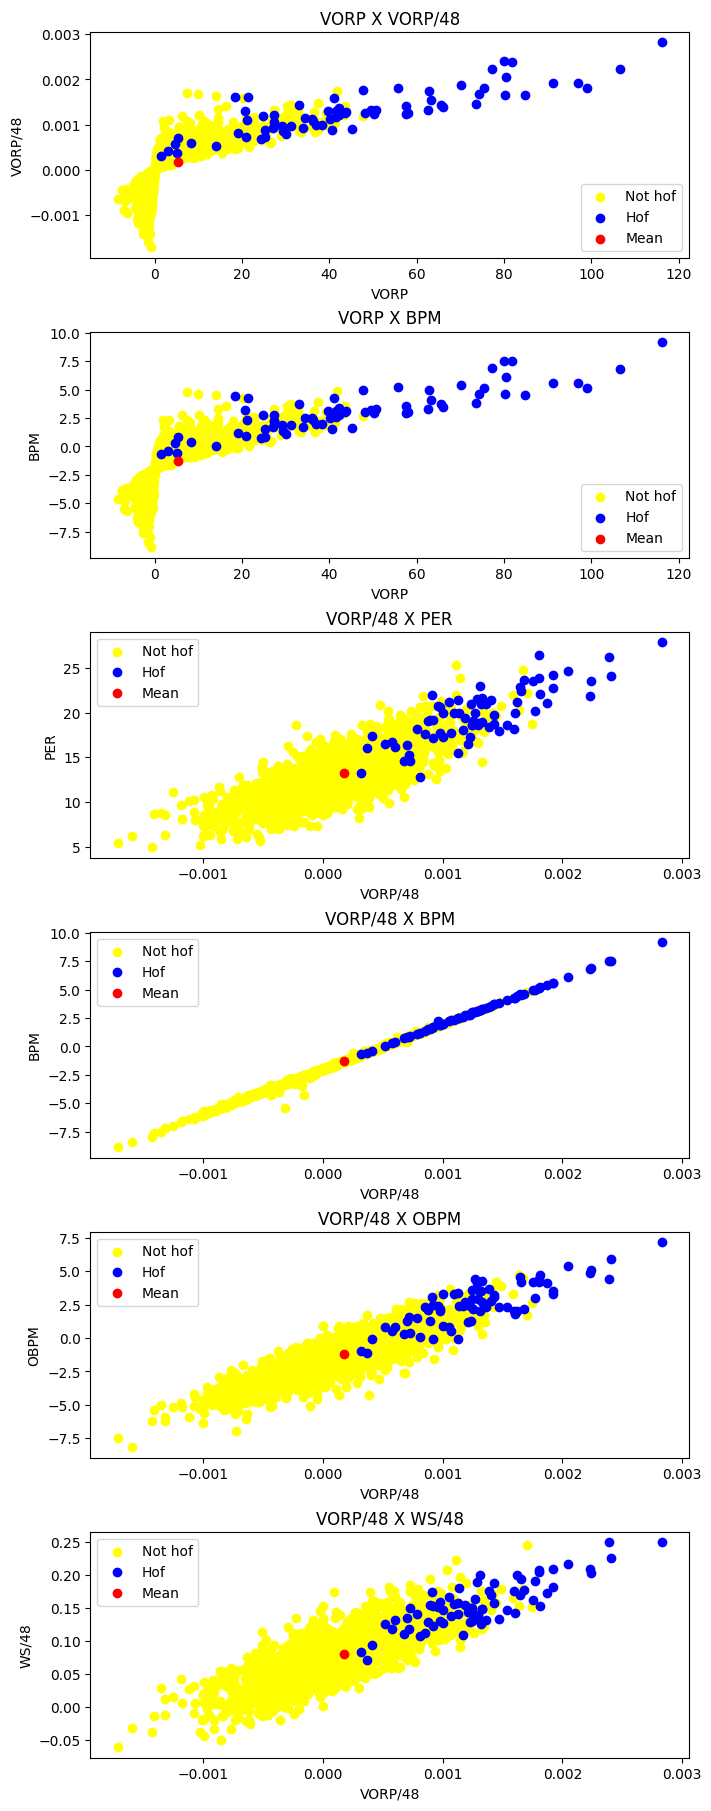

In [23]:
# Some advanced plots (VORP)

training_ad_prepared = training_advanced_prepared.copy()
training_ad_prepared['VORP/48'] = (training_ad_prepared['VORP'] / training_ad_prepared['MP']).fillna(0)

dict = {0 : ['VORP', 'VORP/48'],
        1 : ['VORP', 'BPM'],
        2 : ['VORP/48', 'PER'],
        3 : ['VORP/48', 'BPM'],
        4 : ['VORP/48', 'OBPM'],
        5 : ['VORP/48', 'WS/48']}

plotting_dataset(training_ad_prepared, dict)

In [ ]:
# Some advanced plots (other aspects)

dict = {0 : ['STL%', 'DBPM'],
        1 : ['BLK%', 'DBPM'],
        2 : ['DRB%', 'DBPM'],
        3 : ['TS%', 'OBPM'],
        4 : ['AST%', 'OBPM'],
        5 : ['ORB%', 'OBPM']}

plotting_dataset(training_advanced_prepared.copy(), dict)

## Correlation Matrix advanced

In [ ]:
# Correlation matrix

training_ad_prepared = training_advanced_prepared.copy()

correlation_matrix_advanced = training_ad_prepared[valid_advanced_columns].corr()

plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix_advanced, annot=True, fmt='.1f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix advanced')
plt.show()

# Some per 100 poss plots

In [ ]:
# Valid features

per_100_poss_columns = list(training_per_100_poss_prepared.columns)
columns_to_remove = ['Age', 'Pos', 'G', 'MP', 'From', 'To', 'Player', 'Hof']
valid_per_100_poss_columns = list(filter(lambda column: column not in columns_to_remove, per_100_poss_columns))

In [24]:
# Prep 2

training_p_100_p_prepared = training_per_100_poss_prepared.copy()
training_per_100_poss_prepared['On/Off']= training_per_100_poss_prepared['ORtg'] - training_per_100_poss_prepared['DRtg']
print(training_p_100_p_prepared.describe())
train_p_100_p_prepared_hof, train_p_100_p_prepared_not_hof = (training_p_100_p_prepared[training_p_100_p_prepared['Hof'] == 1],
                                                              training_p_100_p_prepared[training_p_100_p_prepared['Hof'] == 0])


test_p_100_p_prepared = test_per_100_poss_prepared.copy()
test_p_100_p_prepared['On/Off']= test_p_100_p_prepared['ORtg'] - test_p_100_p_prepared['DRtg']
print(test_p_100_p_prepared.describe())
test_p_100_p_hof, test_p_100_p_not_hof = (test_p_100_p_prepared[test_p_100_p_prepared['Hof'] == 1],
                                          test_p_100_p_prepared[test_p_100_p_prepared['Hof'] == 0])

          Age     Pos            G           GS            MP           FG  \
count  1971.0  1971.0  1971.000000  1971.000000   1971.000000  1971.000000   
mean      0.0     0.0   482.040589   216.075089  11432.251649     7.394977   
std       0.0     0.0   304.130266   259.182061   9867.198051     1.774878   
min       0.0     0.0   100.000000     0.000000    524.000000     2.300000   
25%       0.0     0.0   222.500000    28.500000   3425.500000     6.200000   
50%       0.0     0.0   422.000000   107.000000   8433.000000     7.200000   
75%       0.0     0.0   695.000000   322.000000  16418.000000     8.500000   
max       0.0     0.0  1611.000000  1471.000000  54852.000000    15.300000   

               FGA          FG%           3P          3PA  ...         BLK  \
count  1971.000000  1971.000000  1971.000000  1971.000000  ...  1971.00000   
mean     16.273415     0.455848     1.016235     2.965906  ...     1.03861   
std       3.708490     0.047886     1.164849     3.154948  ... 

(<Figure size 700x1800 with 6 Axes>,
 array([<Axes: title={'center': 'FG% X FG'}, xlabel='FG%', ylabel='FG'>,
        <Axes: title={'center': '3P% X 3P'}, xlabel='3P%', ylabel='3P'>,
        <Axes: title={'center': '2P% X 2P'}, xlabel='2P%', ylabel='2P'>,
        <Axes: title={'center': 'FT% X FT'}, xlabel='FT%', ylabel='FT'>,
        <Axes: title={'center': 'FG X PTS'}, xlabel='FG', ylabel='PTS'>,
        <Axes: title={'center': 'FG% X PTS'}, xlabel='FG%', ylabel='PTS'>],
       dtype=object))

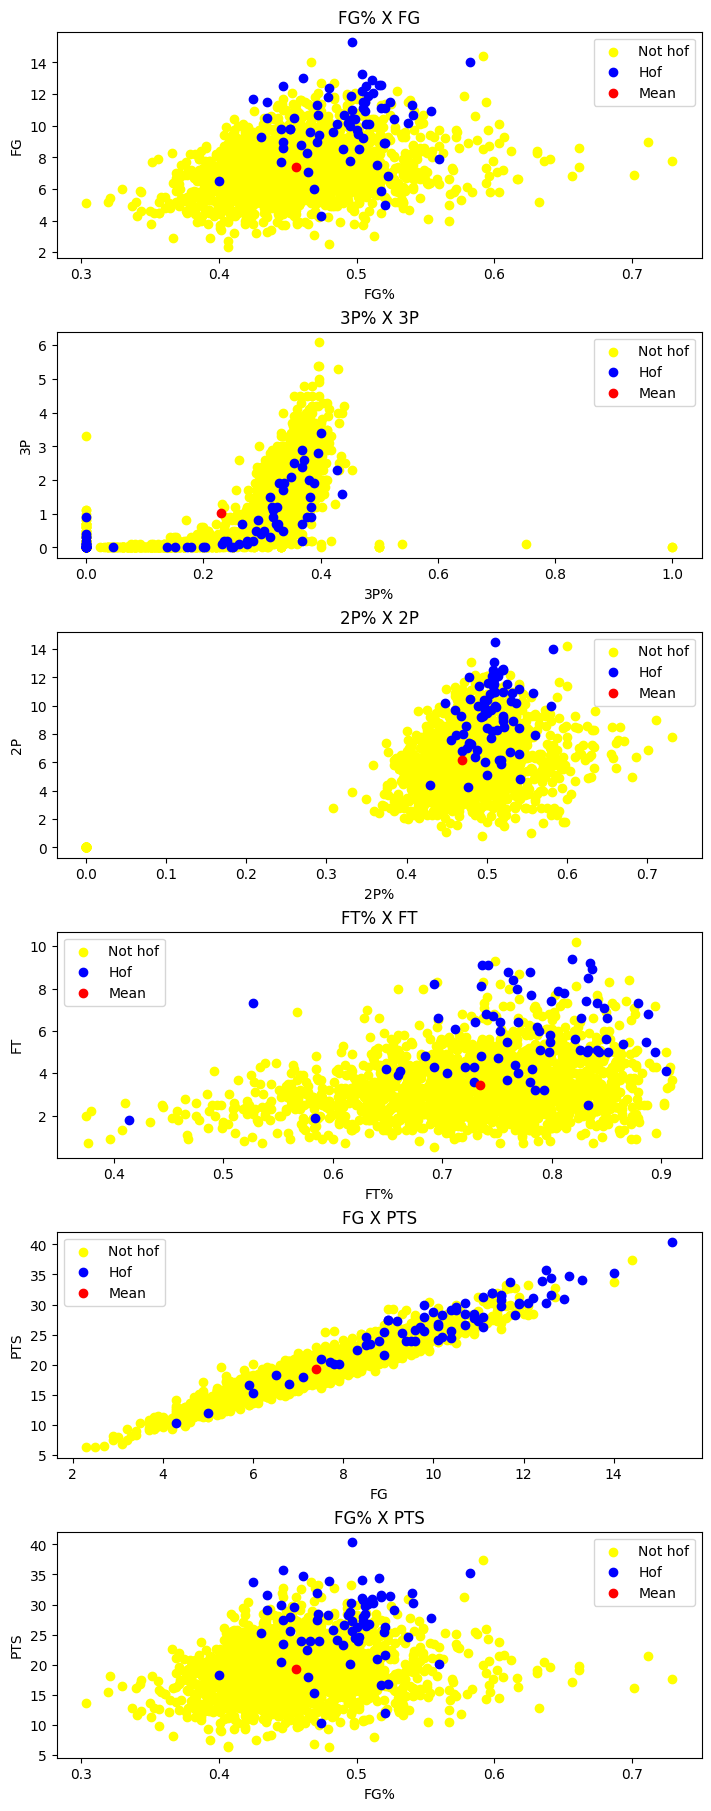

In [28]:
# Some per 100 poss plots (shot percentages)


dict = {0 : ['FG%', 'FG'],
        1 : ['3P%', '3P'],
        2 : ['2P%', '2P'],
        3 : ['FT%', 'FT'],
        4 : ['FG', 'PTS'],
        5 : ['FG%', 'PTS']}

plotting_dataset(training_per_100_poss_prepared.copy(), dict)

(<Figure size 700x900 with 3 Axes>,
 array([<Axes: title={'center': 'TRB X DRB'}, xlabel='TRB', ylabel='DRB'>,
        <Axes: title={'center': 'TRB X ORB'}, xlabel='TRB', ylabel='ORB'>,
        <Axes: title={'center': 'DRB X ORB'}, xlabel='DRB', ylabel='ORB'>],
       dtype=object))

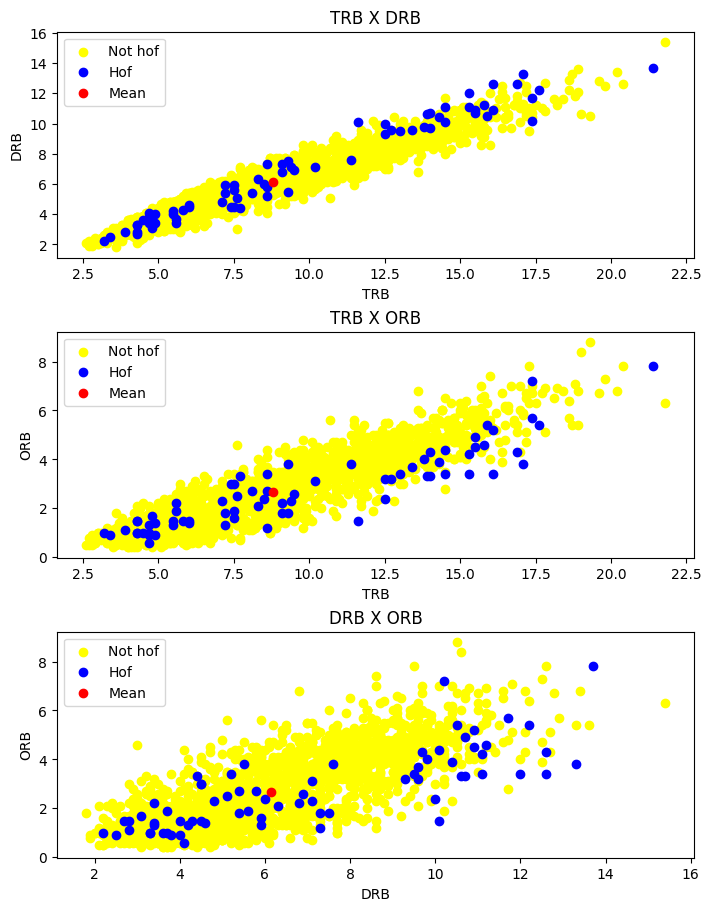

In [29]:
# Some per 100 poss plots (rebounds)


dict = {0 : ['TRB', 'DRB'],
        1 : ['TRB', 'ORB'],
        2 : ['DRB', 'ORB']}

plotting_dataset(training_per_100_poss_prepared.copy(), dict)

(<Figure size 700x900 with 3 Axes>,
 array([<Axes: title={'center': 'AST X TOV'}, xlabel='AST', ylabel='TOV'>,
        <Axes: title={'center': 'AST X STL'}, xlabel='AST', ylabel='STL'>,
        <Axes: title={'center': 'STL X TOV'}, xlabel='STL', ylabel='TOV'>],
       dtype=object))

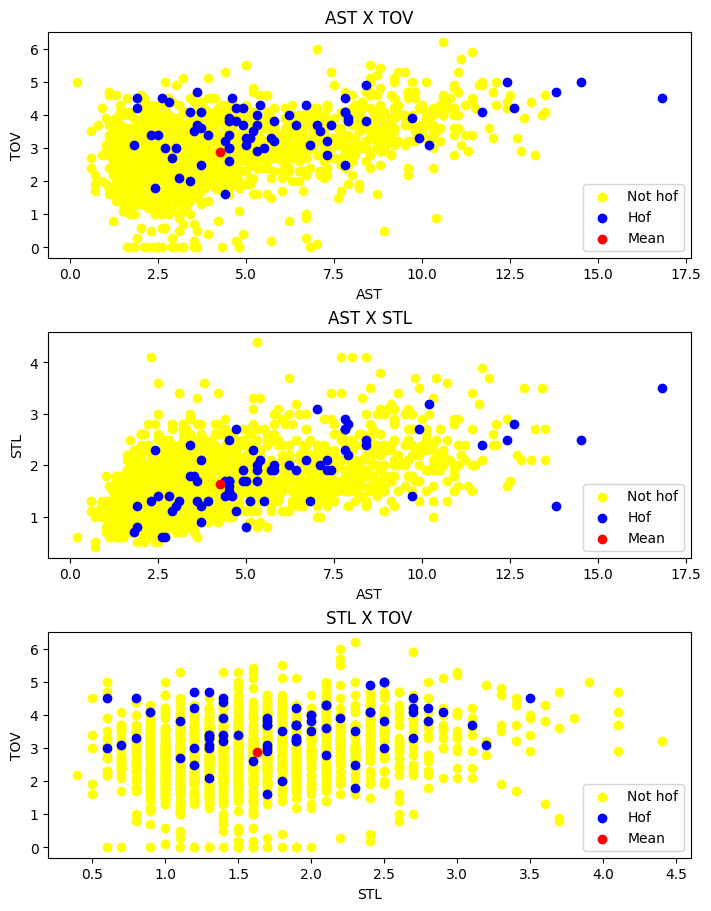

In [33]:
# Some per 100 poss plots (Assists x TOV)


dict = {0 : ['AST', 'TOV'],
        1 : ['AST', 'STL'],
        2 : ['STL', 'TOV']}

plotting_dataset(training_per_100_poss_prepared.copy(), dict)

(<Figure size 700x1800 with 6 Axes>,
 array([<Axes: title={'center': 'FG% X ORtg'}, xlabel='FG%', ylabel='ORtg'>,
        <Axes: title={'center': 'FG X ORtg'}, xlabel='FG', ylabel='ORtg'>,
        <Axes: title={'center': 'PTS X ORtg'}, xlabel='PTS', ylabel='ORtg'>,
        <Axes: title={'center': 'AST X ORtg'}, xlabel='AST', ylabel='ORtg'>,
        <Axes: title={'center': 'TOV X ORtg'}, xlabel='TOV', ylabel='ORtg'>,
        <Axes: title={'center': 'On/Off X ORtg'}, xlabel='On/Off', ylabel='ORtg'>],
       dtype=object))

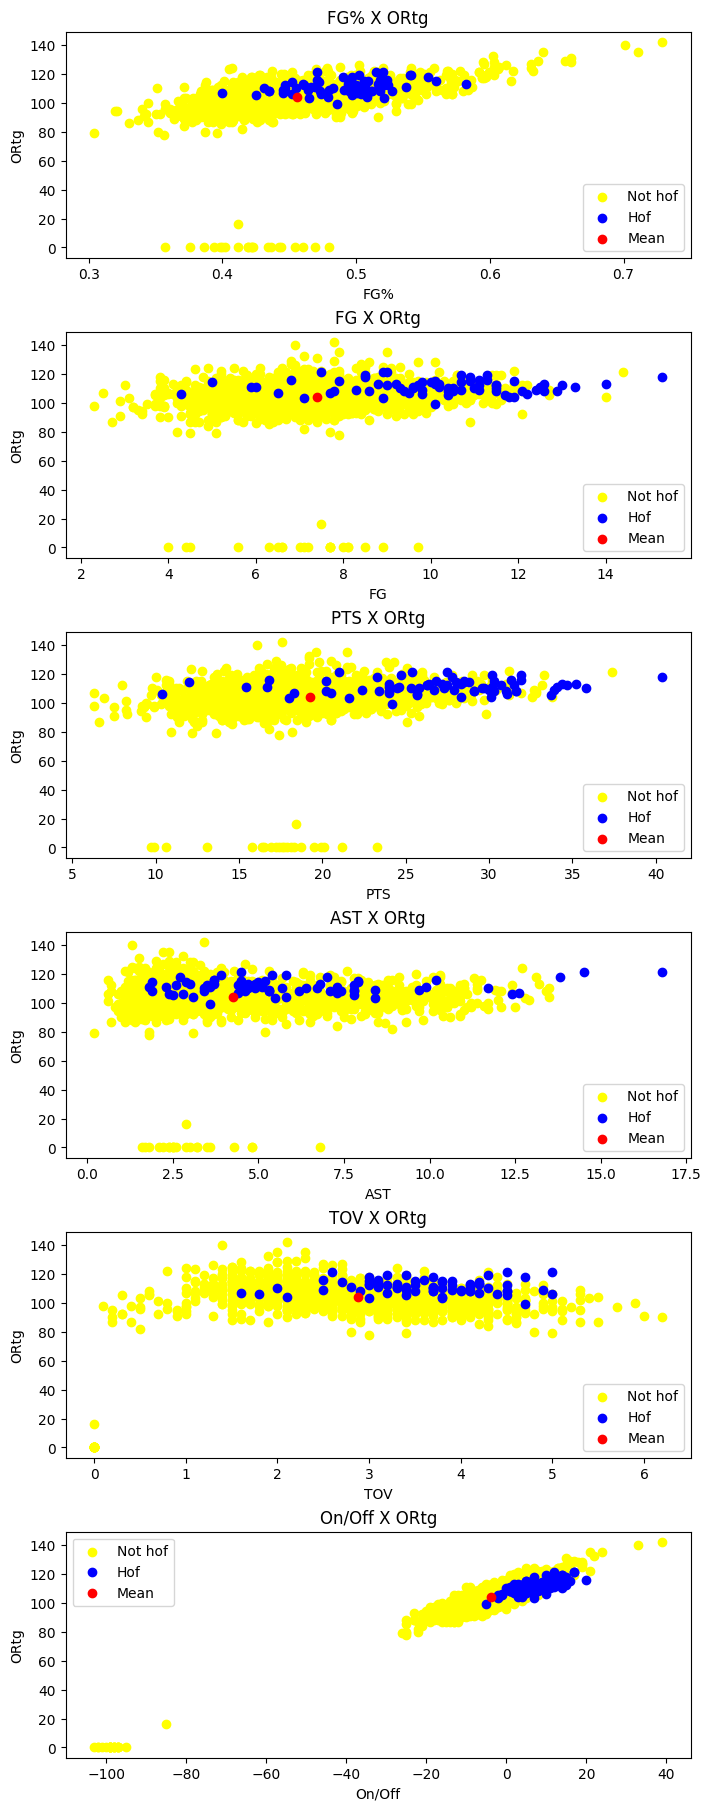

In [34]:
# Some per 100 poss plots (ratings)

dict = {0 : ['FG%', 'ORtg'],
        1 : ['FG', 'ORtg'],
        2 : ['PTS', 'ORtg'],
        3 : ['AST', 'ORtg'],
        4 : ['TOV', 'ORtg'],
        5 : ['On/Off', 'ORtg']}

plotting_dataset(training_per_100_poss_prepared.copy(), dict)

(<Figure size 700x1500 with 5 Axes>,
 array([<Axes: title={'center': 'DRB X DRtg'}, xlabel='DRB', ylabel='DRtg'>,
        <Axes: title={'center': 'STL X DRtg'}, xlabel='STL', ylabel='DRtg'>,
        <Axes: title={'center': 'BLK X DRtg'}, xlabel='BLK', ylabel='DRtg'>,
        <Axes: title={'center': 'PF X DRtg'}, xlabel='PF', ylabel='DRtg'>,
        <Axes: title={'center': 'On/Off X DRtg'}, xlabel='On/Off', ylabel='DRtg'>],
       dtype=object))

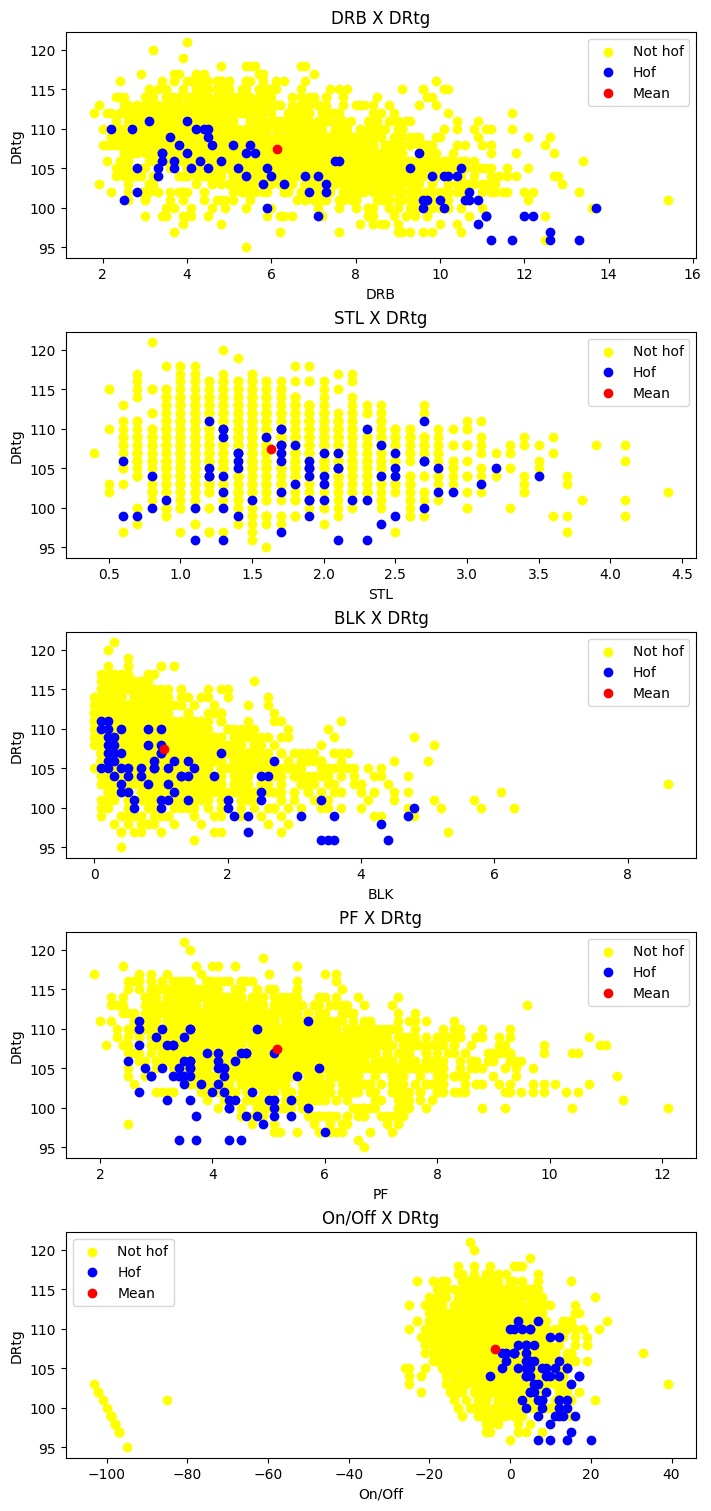

In [37]:
# Some per 100 poss plots (ratings) pt.2

dict = {0 : ['DRB', 'DRtg'],
        1 : ['STL', 'DRtg'],
        2 : ['BLK', 'DRtg'],
        3 : ['PF', 'DRtg'],
        4 : ['On/Off', 'DRtg']}

plotting_dataset(training_per_100_poss_prepared.copy(), dict)

## Correlation Matrix per 100 poss.

In [ ]:
# Correlation matrix

training_p_100_p_prepared = training_per_100_poss_prepared.copy()

correlation_matrix_p_100_p = training_p_100_p_prepared[valid_advanced_columns].corr()

plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix_p_100_p, annot=True, fmt='.1f', cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix per 100 poss.")
plt.show()